# KFolds and NN Homework
Data Mining 2  
20180912  
Ron Neely

Redo the breast cancer example in R or Python using 5-Fold Cross Validation. Remember to use each sample only once.

-	Read data in to a pandas DataFrame and normalize (python)
-	Establish a baseline model using sklearn MLPClassifier from class and show metrics
-	Repeat with kfolds split and test and compare metrics

Remember a competent answer to 1. is worth 9/10. Ask and answer a challenge question on the topic of Neural Networks or K-Folds for the 10th point. (Doesn’t have to be hard. Just has to be something not covered in class.)

**Challenge question**: Investigate whether "m-folds validation" variation of "k-folds" be used as a basis to identify and remove outliers for an improved model. Prediction: "m-folds" will either be novel idea or about as dumb as a square wheel.

"m-folds validation" will

- for every m row:
    +	train on all the other rows
    +	predict the m_th row with that model
    +	keep the m_th row if prediction was accurate
    +	discard the m_th row if prediction was inaccurate, i.e. remove it as an outlier
- train a model all the kept rows (i.e. without removed outliers)
- evaluate and compare metrics with previously predicted models

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
import sys
sys.version

'3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]'

## Read data in to a pandas DataFrame and normalize

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['y'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_breast_cancer())
print(df.shape)
print(df.dtypes, end=' ')
df.head(3)

(569, 31)
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [3]:
y = df['y']
print(len(y))
print(y.dtype)
y.head(3)

569
int32


0    0
1    0
2    0
Name: y, dtype: int32

In [4]:
X_cols = df.columns[0:-1]
scaler = StandardScaler()
df[X_cols] = scaler.fit_transform(df[X_cols])
X = df[X_cols]
print(X.shape)
X.head(3)

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


## Establish a baseline model using sklearn MLPClassifier from class and show metrics

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


Looks like default split was about 75% train, 25% test.

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Metrics for basic model (no k-folds)

In [7]:
y_pred = mlp.predict(X_test)
print("       actual\n       +   -\npred+[[tp, fp]\ndict- [fn, tn]]")
print(confusion_matrix(y_test, y_pred), "\n")
print("\n")
print(classification_report(y_test, y_pred))

       actual
       +   -
pred+[[tp, fp]
dict- [fn, tn]]
[[50  4]
 [ 3 86]] 



             precision    recall  f1-score   support

          0       0.94      0.93      0.93        54
          1       0.96      0.97      0.96        89

avg / total       0.95      0.95      0.95       143



This model did pretty good.  However we do not want to fail to diagnose someone who could potentially have breast cancer because they will die without treatment.  False positives are preferred over false negatives because the patient can get a 2nd opinion.

## k-folds split and test

What if the data were split differently?  Would we get the same result with similar models?

In [8]:
print(y.shape, X.shape)

(569,) (569, 30)


In [24]:
k_fold = KFold(5) # 80% / 20% train / test splits
split = k_fold.split(X,y)
tt = []
for k, (train,test) in enumerate(split):
    print(k, train.shape, test.shape)
    mlp.fit(X.loc[train],y[train])
    y_pred = mlp.predict(X.loc[test])
    cm = confusion_matrix(y[test], y_pred)
    cr = classification_report(y[test], y_pred)
    tt.append([train,test,cm,cr])
    print(cm)
    print(cr)

0 (455,) (114,)
[[66  2]
 [ 2 44]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97        68
          1       0.96      0.96      0.96        46

avg / total       0.96      0.96      0.96       114

1 (455,) (114,)
[[45  4]
 [ 1 64]]
             precision    recall  f1-score   support

          0       0.98      0.92      0.95        49
          1       0.94      0.98      0.96        65

avg / total       0.96      0.96      0.96       114

2 (455,) (114,)
[[38  2]
 [ 0 74]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        40
          1       0.97      1.00      0.99        74

avg / total       0.98      0.98      0.98       114

3 (455,) (114,)
[[29  0]
 [ 1 84]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.98        29
          1       1.00      0.99      0.99        85

avg / total       0.99      0.99      0.99       114



Several of the five kfolds show a false negative.
Iteration '3' performed the worst.

## Challenge question 
    
Invesigate wheter "m-folds validation" variation of "k-folds" be used as a basis to identify and remove outliers for an improved model.  Prediction: "m-folds" will either be novel idea or about as dumb as a square wheel.

- "m-folds validation" will
    + for every m row:
        * train on all the other rows
        * predict the m_th row with that model
        * keep the m_th row if prediction was accurate
        * discard the m_th row if prediction was inaccurate, i.e. remove it as an outlier
    + train a model all the kept rows (i.e. without removed outliers)
    + evaluate and compare metrics with previously predicted models

In [10]:
def m_folds(X, y, algorithm):
    keep = []
    discard = []
    for i, _ in enumerate(y):
        train = np.arange(len(y)) != i
        algorithm.fit(X[train],y[train])
        y_pred = algorithm.predict(X.loc[[i]])
        if y_pred[0] == y[i]:
            keep.append(i)
        else:
            discard.append(i)
    return keep, discard
    

In [11]:
keep, discard = m_folds(X, y, mlp)
print(len(keep), len(discard))

C:\Users\AFMS\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


552 17


In [13]:
y[discard]

40     0
73     0
81     1
99     0
135    0
146    0
157    1
190    0
197    0
213    0
215    0
255    0
291    1
297    0
363    1
526    1
541    1
Name: y, dtype: int32

Create a model based on all the kept rows and test with discarded rows.  
Expect this model to get every answer wrong as it is trained with less data than all the models created with "m-folds".

In [15]:
mlp.fit(X.loc[keep], y[keep])
y_pred= mlp.predict(X.loc[discard])
print(confusion_matrix(y[discard], y_pred))
print(classification_report(y[discard], y_pred))

[[3 8]
 [3 3]]
             precision    recall  f1-score   support

          0       0.50      0.27      0.35        11
          1       0.27      0.50      0.35         6

avg / total       0.42      0.35      0.35        17



Wow.  This model was expected to get 0% correct and it did bettter.  
Perhaps "m-folds" does something.  
Let's exclude the m_folds discarded record from the worst k_means iteration model and see if it does any better.

In [43]:
train = tt[1][0]
test = tt[1][1]
len(train)

455

In [44]:
mask = np.isin(train,keep)
tr = train[mask]
len(tr)

445

In [45]:
mlp.fit(X.loc[tr],y[tr])
y_pred = mlp.predict(X.loc[test])
print(confusion_matrix(y[test], y_pred))
print(classification_report(y[test], y_pred))

[[44  5]
 [ 1 64]]
             precision    recall  f1-score   support

          0       0.98      0.90      0.94        49
          1       0.93      0.98      0.96        65

avg / total       0.95      0.95      0.95       114



In [47]:
print(tt[1][2])
print(tt[1][3])

[[45  4]
 [ 1 64]]
             precision    recall  f1-score   support

          0       0.98      0.92      0.95        49
          1       0.94      0.98      0.96        65

avg / total       0.96      0.96      0.96       114



Not much improvement.  We got one more true positive and the same false negatives.  The f1-score was a little better.
Let's comparare discarded indices to those records which we might otherwise condsider outliers.

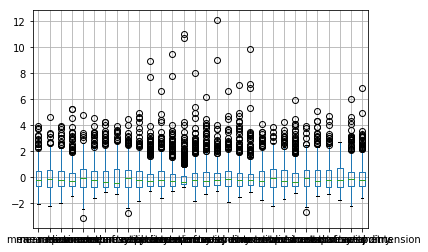

In [48]:
X.boxplot()

Looks like there are a lot of outliers.  The most extreme ones have values of > 6.  Let's get the indicies of these values.

In [64]:
np.isin(discard, X[X>6].stack().reset_index()['level_0'])

array([False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False])

Meh.  Only two extreme outliers were shared.  Looks like m_means is not so great at finding outliers.